# <center>Project</center>

#### Identitas
Indra nurwibisono

Big Data Analytic Kelas 3

##### Menyambungkan ke Goole Drive dan Mounting

In [1]:
##### List Import dari Tweepy untuk Crawling hingga plotlib untuk visualisasi

In [0]:
import tweepy
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import time
import argparse
import string
import csv
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##### Access Token API Twitter

In [0]:
ACCESS_TOKEN = 'Acces Token from your Twitter Dev'
ACCESS_SECRET = 'Access Secret from your Twitter Dev'
CONSUMER_KEY = 'Consumer Key from your Twitter Dev'
CONSUMER_SECRET = 'Consumer Secret from your Twitter Dev'

##### Fungsi untuk menyabungkan API dan memanggilnya

In [0]:
def connect_to_twitter_OAuth():
  auth = tweepy.OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
  auth.set_access_token(ACCESS_TOKEN,ACCESS_SECRET)

  api = tweepy.API(auth,wait_on_rate_limit=True)
  return api

In [0]:
api = connect_to_twitter_OAuth()

### Crawling


#### Melakukan crawling data dari Twitter dengan filter Hashtags *#*

In [0]:
#csvFile = open('data.csv', 'w')
#csvWriter = csv.writer(csvFile)

#for tweet in tweepy.Cursor(api.search, q="#KabinetIndonesiaMaju -filter:retweets", count = 200, show_user=True, lang="id").items(10000):
#    csvWriter.writerow([tweet.id, tweet.user.screen_name, tweet.created_at, tweet.text])
#csvFile.close()

### DataFrame dari JSON file

In [0]:
dataAkun = pd.read_json('data/data.json')

In [0]:
labelO = dataAkun['label'] == "Openness to Experience"
labelC = dataAkun['label'] == "Conscientiousness"
labelE = dataAkun['label'] == "Extraversion"
labelA = dataAkun['label'] == "Agreetableness"
labelN = dataAkun['label'] == "Neuroticsm"
noAkun = (dataAkun['akun'] != 'Ukhtinfkrmh') & (dataAkun['akun'] != 'zayichi') & (dataAkun['akun'] != 'shellaw_') & (dataAkun['akun'] != 'anitarhmlia') & (dataAkun['akun'] != 'eenfitriani') & (dataAkun['akun'] != 'atsya_rf') & (dataAkun['akun'] != 'fajarmblunk') & (dataAkun['akun'] != 'hasnadiniya') & (dataAkun['akun'] != 'Gabrilfanis') & (dataAkun['akun'] != 'indiracw') & (dataAkun['akun'] != 'Monica_triyani') & (dataAkun['akun'] != 'naputralala') & (dataAkun['akun'] != 'Raishapr') & (dataAkun['akun'] != 'shondesip') & (dataAkun['akun'] != 'wltrmtty') & (dataAkun['akun'] != 'ov3rth') & (dataAkun['akun'] != 'priquelaa')

tupleLabelO = dataAkun['akun'][labelO & noAkun].tail(8).values.tolist()
tupleLabelC = dataAkun['akun'][labelC & noAkun].head(8).values.tolist()
tupleLabelE = dataAkun['akun'][labelE & noAkun].head(8).values.tolist()
tupleLabelA = dataAkun['akun'][labelA & noAkun].head(8).values.tolist()
tupleLabelN = dataAkun['akun'][labelN & noAkun].head(8).values.tolist()

In [0]:
crawlAkun = tupleLabelO + tupleLabelC + tupleLabelE + tupleLabelA + tupleLabelN

List Akun Twitter

In [0]:
print(crawlAkun)

['toboboto', 'tubagussy', 'ulfahfayumi', 'varialkindy', 'vinzz_julian1', 'viscalita', 'wahyuasyr', 'winengkuu', 'annrahma', 'chandra_rubi', 'darmawan_fajar', 'edward_widjaja', 'Handik_Y', 'ignroberto', 'izza_ucon', 'LMunzila', 'aliefirham', 'DilaAjh', 'Gmasimuja', 'izzahafsyah', 'nihsanpm', 'pinkpolihs', 'NafaMeinitasari', 'willyanggara11', 'aderizkyputrii', 'alfrido90', 'brianduenr', 'kakakhai', 'marwahraisyaa', 'maryamrima', 'masmasonn', 'Yevaciaa', 'ayu_sriayuni', 'cynthiapsp', 'dimaspraptanto', 'Ghanini', 'graceceso', 'mr_alwafi', 'MUst_17', 'veronicaardhani']


In [0]:
print(len(crawlAkun))

40


#### Melakukan crawling data dari User Timeline

In [0]:
csvFile = open('data/data_raw.csv', 'w')
csvWriter = csv.writer(csvFile)

for x in crawlAkun:
 for tweet in tweepy.Cursor(api.user_timeline, screen_name = x, count = 200, show_user=True, lang="id").items(700):
   csvWriter.writerow([tweet.id, tweet.user.screen_name, tweet.created_at, tweet.text])   
csvFile.close()

### Dataframe dari CSV
Data yang sudah di-Crawling dan di masukan ke file CSV, selanjutnya dipanggi dan dimasukan ke dataframe *dataSet*

In [0]:
# dataSet = pd.read_csv('Mendikbud.csv', sep=',', names=["id", "akun", "created_at", "tweet"])
# dataSet.head()

### Data Akun User

In [0]:
dataTweet = pd.read_csv('data/data_raw.csv', sep=',', names=["id", "akun", "created_at", "tweet"])
dataTweet.head()

,id,akun,created_at,tweet
0,1187228208308994048,toboboto,2019-10-24 04:43:57,@collegemenfess Di websitenya trs masukkin nam...
1,1187225256479444994,toboboto,2019-10-24 04:32:13,@rlthingy Mau!
2,1187211769116119040,toboboto,2019-10-24 03:38:37,RT @KatolikG: #NadiemMakarim adalah Menteri Pe...
3,1185923884068917248,toboboto,2019-10-20 14:21:02,"@salsabilathfl Stahp, youre unstoppable and yo..."
4,1185753253302038528,toboboto,2019-10-20 03:03:00,"@askmenfess Wealth, money, happiness 😙 amin"


In [0]:
dataTweet.shape

(24814, 4)

## Preprocessing

##### List Import

In [0]:
import nltk
nltk.download("popular")
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
import string
import re

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [0]:
# pip install Sastrawi

#### Lowercase
Mengubah semua dokumen menhadi huruf kecil

In [0]:
dataTweet['lowercase'] = dataTweet['tweet'].apply(lambda x: ' '.join([word.lower() for word in x.split()]))

#### Regex
Menghapus beberapa expression yang tidak diperlukan seperti *@* dan titik

In [0]:
import re

def split_it(text):
 return re.sub(":|<[^>]+>|(?:@[\w_]+)|\.{3}|\…|(?:\#+[\w_]+[\w\'_\-]*[\w_]+)|(?:(?:\d+,?)+(?:\.?\d+)?)|http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+", "", text)

dataTweet['regex'] = dataTweet['lowercase'].apply(lambda x: split_it(x))

#### Punctuation
Menghilangkan tanda baca dan lainnya

In [0]:
dataTweet['punctuation'] = dataTweet['regex'].apply(lambda x: x.translate(str.maketrans('','',string.punctuation)))

#### Stopword
Menhilangkan kata umum yang tidak berarti seperti *di* *yang* dan sejenisnya

In [0]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

dictstopword = pd.read_csv('dictionary.csv', sep=',', usecols=[1, 2], names=["word", "stopword"])

factory = StopWordRemoverFactory()
newstopword = dictstopword['word'][dictstopword['stopword'] == 'Ya'].values.tolist()
morefactory = ['ben','tar','di','rt']
allstopword = newstopword + morefactory
stopword = factory.get_stop_words() + allstopword

In [0]:
dataTweet['stopword'] = dataTweet['punctuation'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopword)]))

#### Stemming
Mengubah variasi morfologi kata dengan cara menghilangkan imbuhan pada setiap kata

##### Stemming menggunakan library *Sastrawi*

In [0]:
# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# factory = StemmerFactory()
# stemmer = factory.create_stemmer()

# dataTweet['sastrawi'] = dataTweet['stopword'].apply(lambda x: stemmer.stem(x))

#####Stemming menggunakan library *NLTK*

In [0]:
ps = PorterStemmer() 
dataTweet['stemm'] = dataTweet['stopword'].apply(lambda x: ps.stem(x))

#### Tokenization
Memisahakan kalimat menjadi kata-kata

In [0]:
tk = TweetTokenizer() 
dataTweet['tokenize'] = dataTweet['punctuation'].apply(lambda x: tk.tokenize(x))

#### Frequency
Menghitungkan jumlah kata pada sau dokumen

In [0]:
dataTweet['frequency'] = dataTweet['tokenize'].apply(lambda x: nltk.FreqDist(x))

In [0]:
export_csv = dataTweet.to_csv (r'/gdrive/My Drive/Big Data DTS 2019/Tugas Project/data/data_pre.csv', index = None, header=True)

# <center>Analisis

#### Sum
Menjumlahkan setiap kata pada semua dokumen

In [0]:
# sumData = dataTweet['frequency'].sum()

memunculkan 10 kata terbanyak yangmuncul pada semua dokumen

In [0]:
# data = sumData.most_common(10)
# print(data)
# d1 = [i[0]for i in data]
# d2 = [i[1]for i in data]

#### Label

In [0]:
labelAkun = dataAkun[['akun','label']][dataAkun['akun'].isin(crawlAkun)]
dataSetTweet = pd.merge(labelAkun, dataTweet, on='akun')

In [0]:
dataTweet.shape

(24814, 11)

In [0]:
print(len(crawlAkun))

40


In [0]:
dataSetTweet.shape

(19882, 12)

In [0]:
dataSetTweet.head()

,akun,label,id,created_at,tweet,lowercase,regex,punctuation,stopword,stemm,tokenize,frequency
0,aderizkyputrii,Agreetableness,1187947429724745728,2019-10-26 04:21:52,pekerjaan paling susah: ngisi air di cetakan e...,pekerjaan paling susah: ngisi air di cetakan e...,pekerjaan paling susah ngisi air di cetakan es...,pekerjaan paling susah ngisi air di cetakan es...,pekerjaan susah ngisi cetakan sesedikit apapun...,pekerjaan susah ngisi cetakan sesedikit apapun...,"[pekerjaan, paling, susah, ngisi, air, di, cet...","{'pekerjaan': 1, 'paling': 1, 'susah': 1, 'ngi..."
1,aderizkyputrii,Agreetableness,1187810354841014272,2019-10-25 19:17:11,AYOTA KAPAN NILAI UTS KELUAR,ayota kapan nilai uts keluar,ayota kapan nilai uts keluar,ayota kapan nilai uts keluar,ayota uts keluar,ayota uts keluar,"[ayota, kapan, nilai, uts, keluar]","{'ayota': 1, 'kapan': 1, 'nilai': 1, 'uts': 1,..."
2,aderizkyputrii,Agreetableness,1187775306779594753,2019-10-25 16:57:55,"@ikanatassa sepakat kak. somebody told me, ""me...","@ikanatassa sepakat kak. somebody told me, ""me...","sepakat kak. somebody told me, ""merpati yg ba...",sepakat kak somebody told me merpati yg baik ...,somebody told me yg baik tau terbaik utk,somebody told me yg baik tau terbaik utk,"[sepakat, kak, somebody, told, me, merpati, yg...","{'sepakat': 1, 'kak': 1, 'somebody': 1, 'told'..."
3,aderizkyputrii,Agreetableness,1187774636584366080,2019-10-25 16:55:15,ih udah poo case closed ya kasian kakaknya:(,ih udah poo case closed ya kasian kakaknya:(,ih udah poo case closed ya kasian kakaknya(,ih udah poo case closed ya kasian kakaknya,udah case closed kasian kakaknya,udah case closed kasian kakaknya,"[ih, udah, poo, case, closed, ya, kasian, kaka...","{'ih': 1, 'udah': 1, 'poo': 1, 'case': 1, 'clo..."
4,aderizkyputrii,Agreetableness,1187774470317998082,2019-10-25 16:54:36,@Hujandisenja I FEEL THE SAME WAY KAK NAJ😭💓🙌,@hujandisenja i feel the same way kak naj😭💓🙌,i feel the same way kak naj😭💓🙌,i feel the same way kak naj😭💓🙌,feel the same way naj😭💓🙌,feel the same way naj😭💓🙌,"[i, feel, the, same, way, kak, naj, 😭, 💓, 🙌]","{'i': 1, 'feel': 1, 'the': 1, 'same': 1, 'way'..."


#### TF-IDF

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

corpus = dataSetTweet['stemm']
y = dataSetTweet.iloc[:,1]

tfidfconverter = TfidfVectorizer(max_features = 2000, min_df = 5, max_df = 0.7)
dataTransform = tfidfconverter.fit_transform(corpus).toarray()

In [0]:
from sklearn.model_selection import train_test_split
dataTransform_train, dataTransform_text, y_train, y_test = train_test_split(dataTransform, y, test_size = 0.2, random_state = 0)

#### SVM

In [0]:
from sklearn import svm

#### Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators = 100, random_state = 0)
text_classifier.fit(dataTransform_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
prediction = text_classifier.predict(dataTransform_text)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))
print('Accuracy: ', accuracy_score(y_test, prediction))

[[430  85  66 111 253]
 [174 304  48 139 216]
 [105  76 214 103 127]
 [222 103  81 224 189]
 [126  96  41  81 363]]
                        precision    recall  f1-score   support

        Agreetableness       0.41      0.46      0.43       945
     Conscientiousness       0.46      0.35      0.39       881
          Extraversion       0.48      0.34      0.40       625
            Neuroticsm       0.34      0.27      0.30       819
Openness to Experience       0.32      0.51      0.39       707

              accuracy                           0.39      3977
             macro avg       0.40      0.39      0.38      3977
          weighted avg       0.40      0.39      0.38      3977

Accuracy:  0.38596932361076186


# <center>Visualisasi
Menvisualisasikan data frekuensi</center>

### Tree Pltot

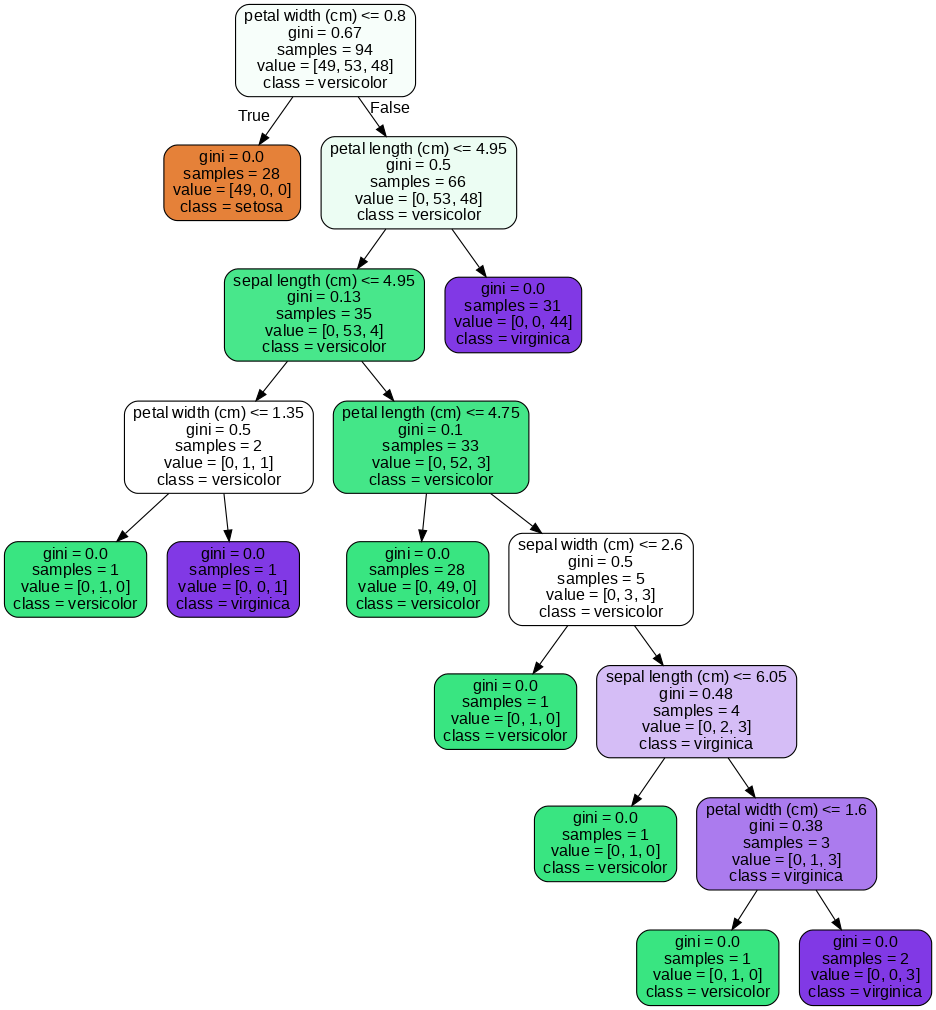

In [0]:
from sklearn.datasets import load_iris
iris = load_iris()

# Model (can also use single decision tree)
model = text_classifier

# Train
model.fit(iris.data, iris.target)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=80'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [0]:
sumData = dataTweet.groupby(['akun'])['tweet'].count()

In [0]:
sumData

akun
DilaAjh            227
Handik_Y           700
MUst_17            700
NIhsanPM            32
NafaMeinitasari    700
UlfahFayumi        700
Vinzz_Julian1      700
aderizkyputrii     700
alfrido90          700
aliefirham         700
annrahma           700
ayu_sriayuni       700
brianduenr         700
chandra_rubi       666
cynthiapsp         574
darmawan_fajar     700
dimaspraptanto     162
edward_widjaja     679
ghanini            700
gmasimuja          700
graceceso          700
ignroberto         700
izza_ucon           74
izzahafsyah        700
kakakhai           700
lmunzila           700
marwahraisyaa      700
maryamrima         700
masmasonn          700
mr_alwafi          700
pinkpolihs         700
toboboto           700
tubagusSY          700
varialkindy        700
veronicaardhani    700
viscalita          700
wahyuasyr          700
winengkuu          700
yevaciaa           700
Name: tweet, dtype: int64

## WordCloud

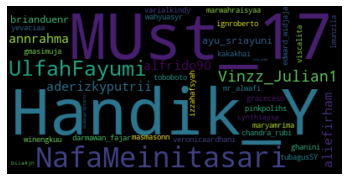

In [0]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=sumData)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()